In [ ]:
import pandas as pd
import numpy as np
!pip install dtreeviz
from dtreeviz.trees import *
from IPython.display import Image,display_svg,SVG


In [ ]:
from dtreeviz.trees import *
from IPython.display import Image,display_svg,SVG

In [ ]:
bank=pd.read_csv("/content/bank-full.csv",delimiter=";")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
bank.duplicated().sum()

0

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
correlation=bank['duration'].corr(bank['campaign'])
print(correlation)

-0.08456950273006175


In [ ]:
correlation1=bank['campaign'].corr(bank['pdays'])
print(correlation1)

-0.08862766791568391


In [ ]:
correlation2=bank['pdays'].corr(bank['previous'])
print(correlation2)

0.45481963548050075


In [ ]:
covariance=bank['duration'].cov(bank['campaign'])
print(covariance)

-67.47179378839323


In [ ]:
covariance1=bank['pdays'].cov(bank['campaign'])
print(covariance1)

-27.49238643767664


In [ ]:
covariance2=bank['pdays'].cov(bank['previous'])
print(covariance2)

104.89990240555599


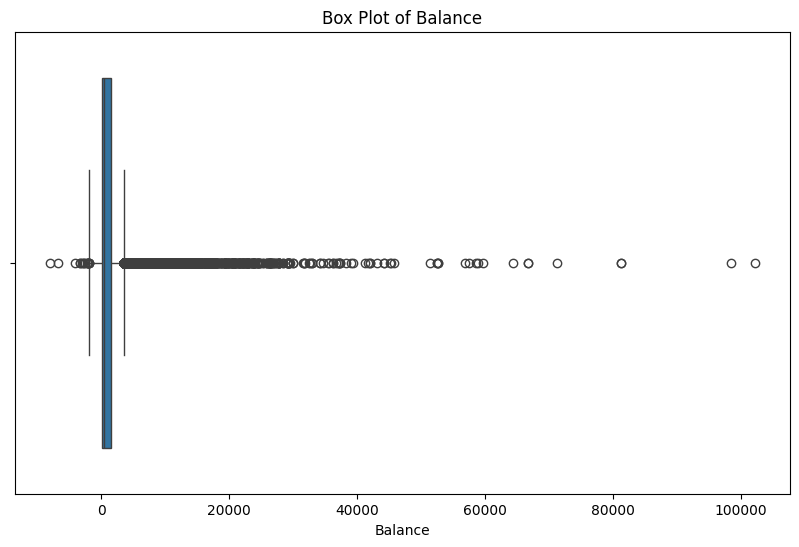

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x=bank['balance'])
plt.title('Box Plot of Balance')
plt.xlabel('Balance')
plt.show()

In [ ]:
column = 'balance'

Q1 = bank[column].quantile(0.25)
Q3 = bank[column].quantile(0.75)

IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = bank[(bank[column] < lower_bound) | (bank[column] > upper_bound)]

print("Outliers in column '{}':".format(column))
print(outliers)

Outliers in column 'balance':
       age          job   marital  education default  balance housing loan  \
34      51   management   married   tertiary      no    10635     yes   no   
65      51   management   married   tertiary      no     6530     yes   no   
69      35  blue-collar    single  secondary      no    12223     yes  yes   
70      57  blue-collar   married  secondary      no     5935     yes  yes   
186     40     services  divorced    unknown      no     4384     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
45164   35     services   married   tertiary      no     4655      no   no   
45181   46  blue-collar   married  secondary      no     6879      no   no   
45185   60     services   married   tertiary      no     4256     yes   no   
45191   75      retired  divorced   tertiary      no     3810     yes   no   
45208   72      retired   married  secondary      no     5715      no   no   

        contact  day month  durat

In [ ]:
rich_clients = outliers[outliers['balance'] > upper_bound]
print("Rich clients data:")
print(rich_clients)


Rich clients data:
       age          job   marital  education default  balance housing loan  \
34      51   management   married   tertiary      no    10635     yes   no   
65      51   management   married   tertiary      no     6530     yes   no   
69      35  blue-collar    single  secondary      no    12223     yes  yes   
70      57  blue-collar   married  secondary      no     5935     yes  yes   
186     40     services  divorced    unknown      no     4384     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
45164   35     services   married   tertiary      no     4655      no   no   
45181   46  blue-collar   married  secondary      no     6879      no   no   
45185   60     services   married   tertiary      no     4256     yes   no   
45191   75      retired  divorced   tertiary      no     3810     yes   no   
45208   72      retired   married  secondary      no     5715      no   no   

        contact  day month  duration  campai

In [ ]:
print(outliers.describe())


               age        balance          day     duration     campaign  \
count  4729.000000    4729.000000  4729.000000  4729.000000  4729.000000   
mean     43.577289    7539.743286    16.149926   275.337281     2.672870   
std      11.508200    6317.738249     7.934811   273.667322     2.943594   
min      19.000000   -8019.000000     1.000000     0.000000     1.000000   
25%      34.000000    4323.000000    10.000000   107.000000     1.000000   
50%      42.000000    5608.000000    17.000000   190.000000     2.000000   
75%      52.000000    8266.000000    21.000000   342.000000     3.000000   
max      87.000000  102127.000000    31.000000  4918.000000    63.000000   

             pdays     previous  
count  4729.000000  4729.000000  
mean     39.323536     0.688941  
std      91.018070     2.183107  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     779.000000    40.000000  


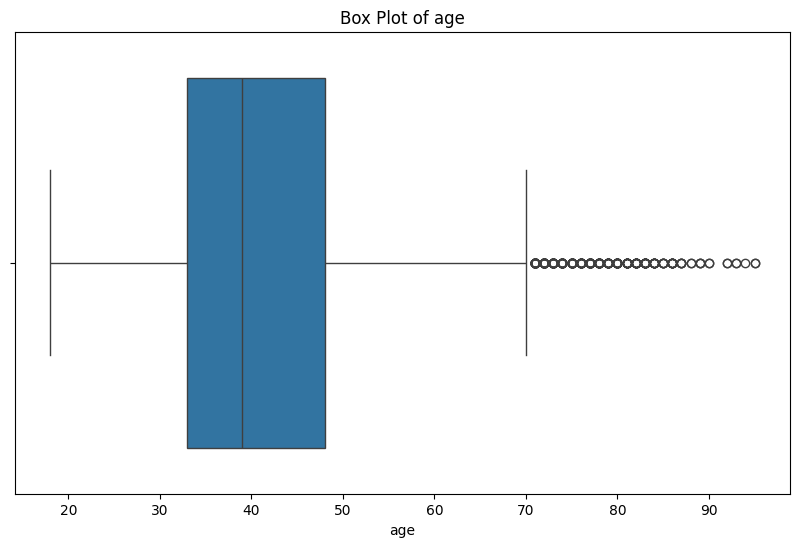

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=bank['age'])
plt.title('Box Plot of age')
plt.xlabel('age')
plt.show()

In [ ]:


Q1 = bank['age'].quantile(0.25)
Q3 = bank['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = bank[(bank['age'] < lower_bound) | (bank['age'] > upper_bound)]


print("Outliers in column '{}':".format(bank['age']))
print(outliers)

Outliers in column '0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int64':
       age      job   marital  education default  balance housing loan  \
29158   83  retired   married    primary      no      425      no   no   
29261   75  retired  divorced    primary      no       46      no   no   
29263   75  retired   married    primary      no     3324      no   no   
29322   83  retired   married   tertiary      no     6236      no   no   
29865   75  retired  divorced    primary      no     3881     yes   no   
...    ...      ...       ...        ...     ...      ...     ...  ...   
45163   71  retired   married  secondary      no     2064      no   no   
45191   75  retired  divorced   tertiary      no     3810     yes   no   
45204   73  retired   married  secondary      no     2850      no   no   
45207   71  retired  divorced    primary      no     1729      no  

In [ ]:
min_age = outliers[outliers['age'] < lower_bound]
print("minimum age:")
print(min_age)


minimum age:
Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [ ]:
x=bank.iloc[:,:-1]
y=bank.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape

(31647, 16)

In [ ]:
x_test.shape

(13564, 16)

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.preprocessing import LabelEncoder
    param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 50]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')



    label_encoders = {}

    relevant_columns = ['job', 'marital', 'education','default','housing','loan','contact','month','poutcome']
    for col in relevant_columns:
     le = LabelEncoder()
     all_unique_values = list(set(x_train[col].unique()) | set(x_test[col].unique()))
     le.fit(all_unique_values)
     label_encoders[col] = le

    for col in x_train.columns:
     if x_train[col].dtype == 'object' and col in relevant_columns:
        x_train[col] = label_encoders[col].transform(x_train[col])


    for col in x_test.columns:
     if x_test[col].dtype == 'object' and col in relevant_columns:
        x_test[col] = label_encoders[col].transform(x_test[col])  # Use the corresponding encoder for this column


    grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10, 15, 20, None],
                         'min_samples_leaf': [1, 5, 10, 20, 50],
                         'min_samples_split': [2, 10, 20, 50, 100]},
             scoring='accuracy')

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)
print("Test set accuracy: ", accuracy_score(y_test, y_pred))

Best parameters found:  {'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 2}
Best cross-validation score:  0.9014126552540189
Test set accuracy:  0.8987024476555588


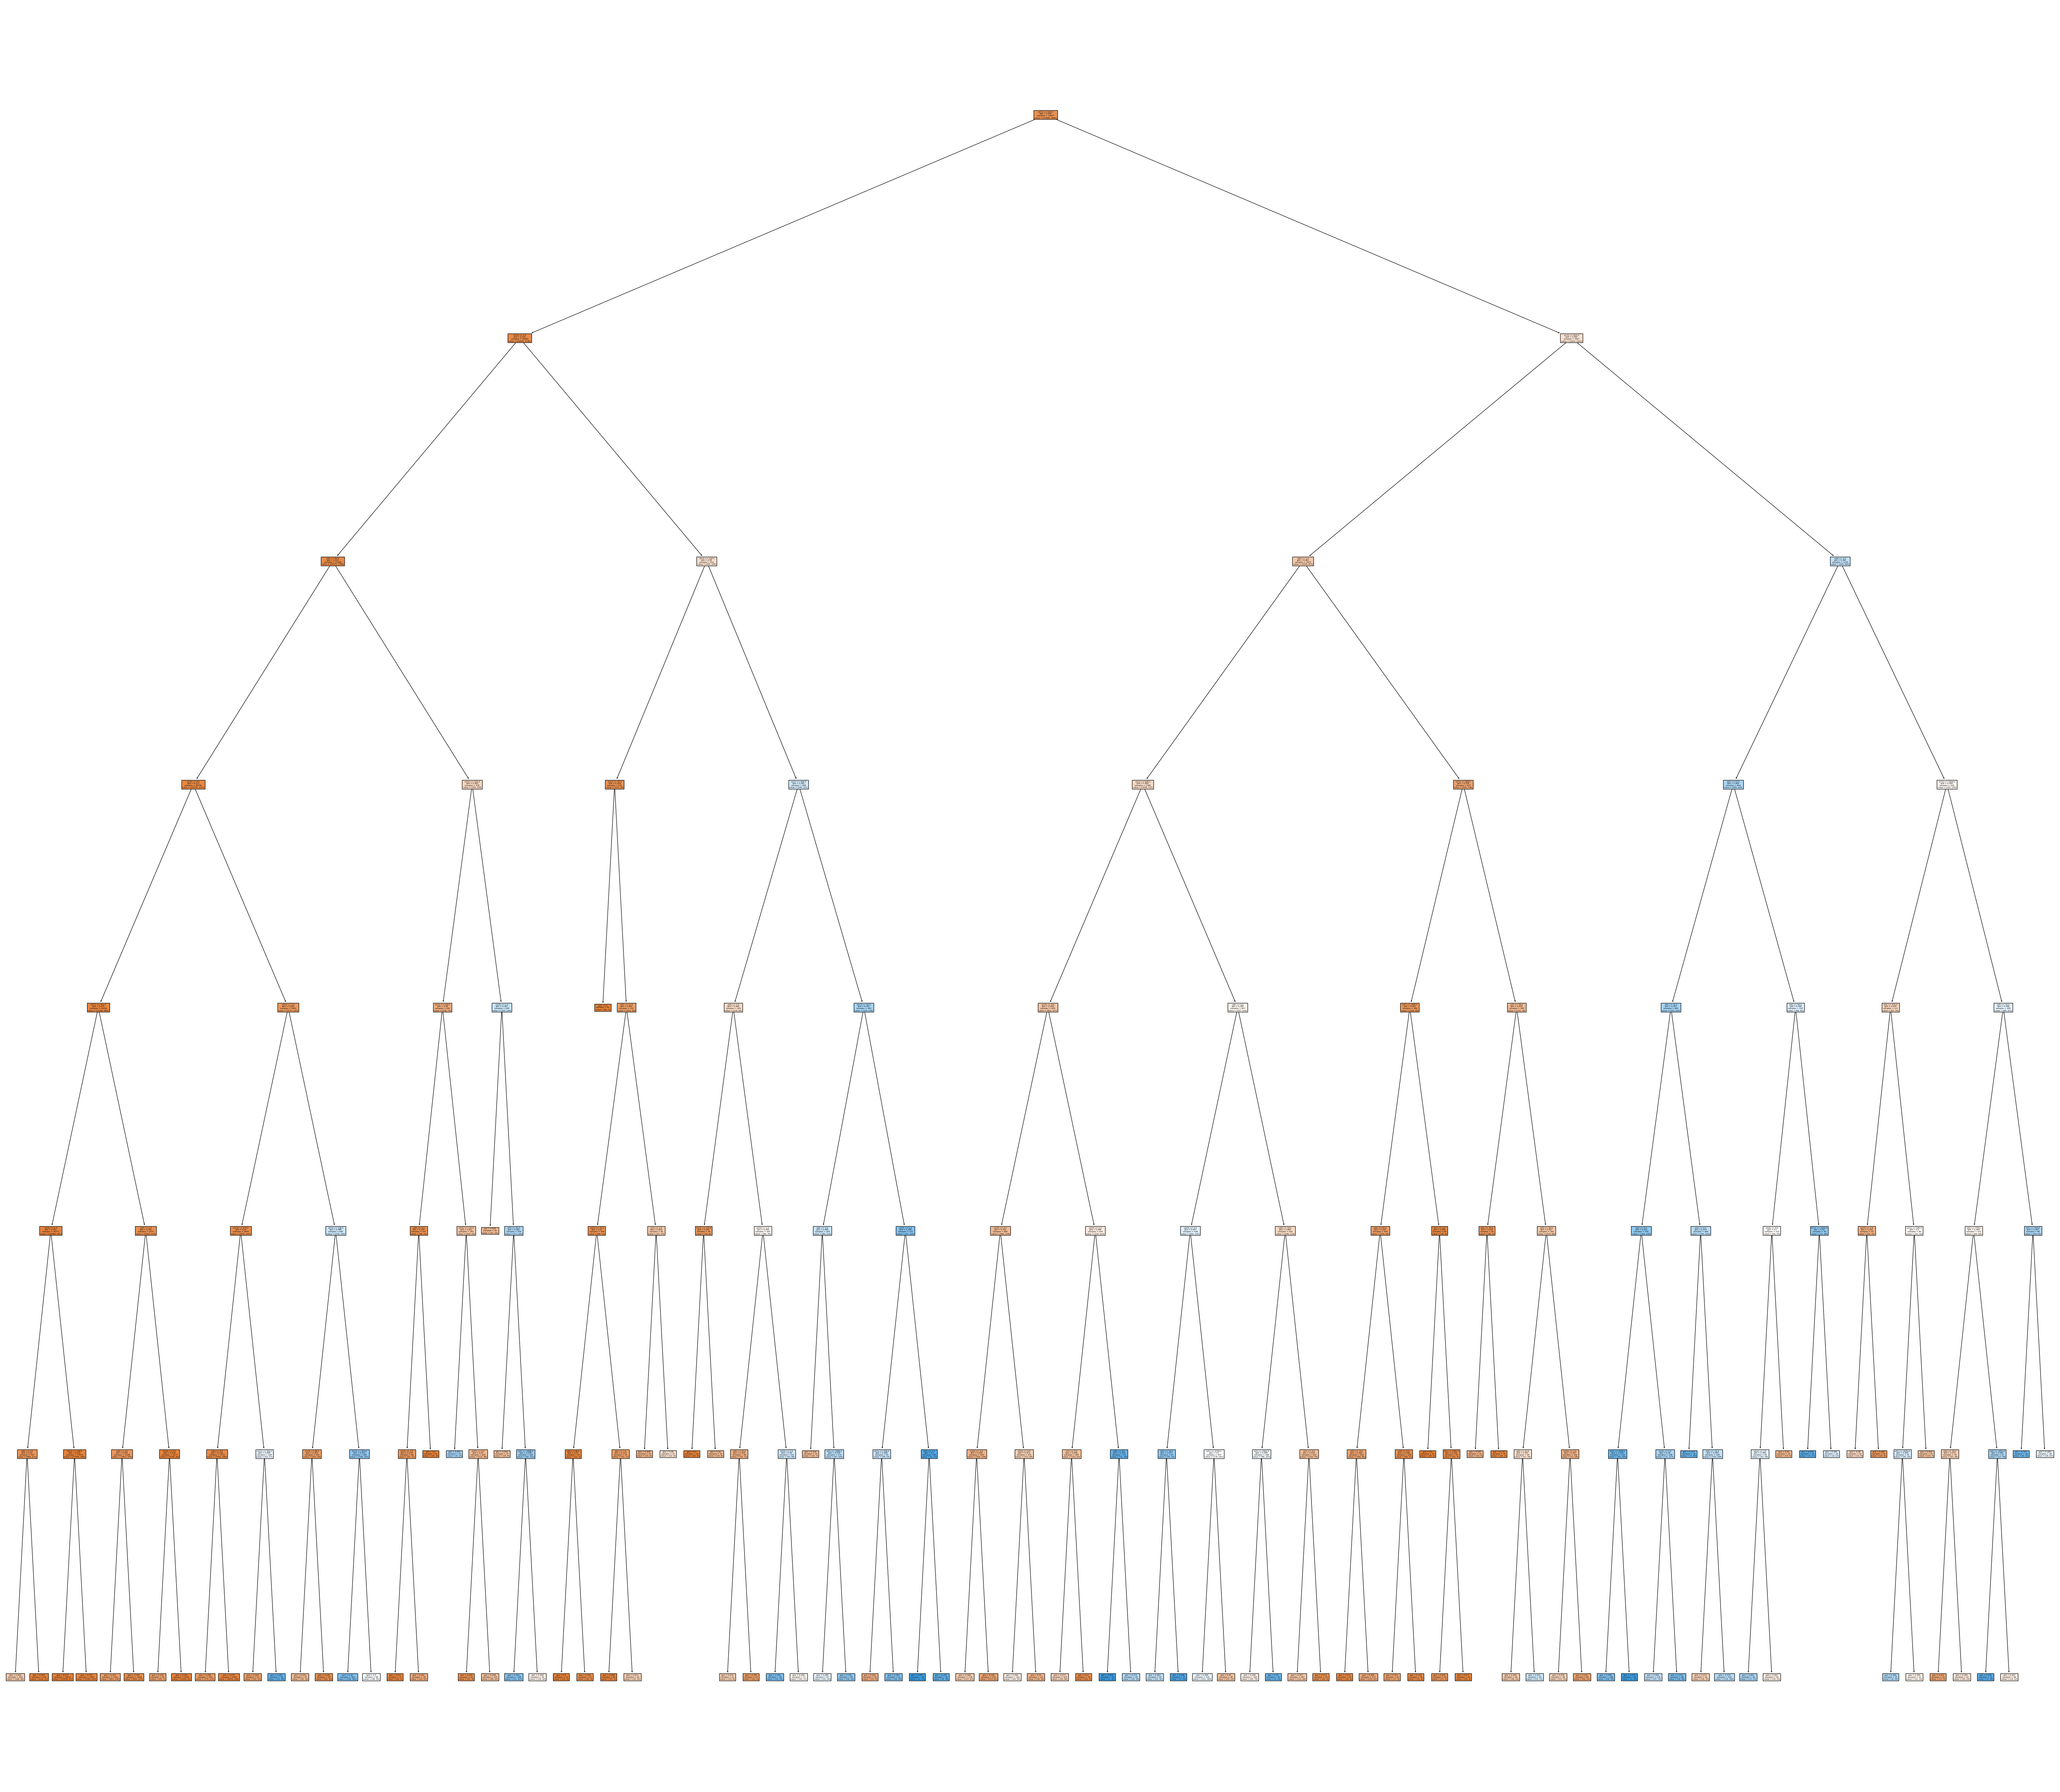

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(80, 70))
plot_tree(best_clf, filled=True)
plt.show()